In [50]:
import numpy as np 
import pandas as pd

In [51]:
df=pd.read_csv("mountains_vs_beaches_preferences.csv")
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


In [52]:
df.isna().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [53]:
df.dtypes

Age                        int64
Gender                    object
Income                     int64
Education_Level           object
Travel_Frequency           int64
Preferred_Activities      object
Vacation_Budget            int64
Location                  object
Proximity_to_Mountains     int64
Proximity_to_Beaches       int64
Favorite_Season           object
Pets                       int64
Environmental_Concerns     int64
Preference                 int64
dtype: object

In [54]:
df["Gender"].value_counts()

Gender
female        17638
male          17522
non-binary    17284
Name: count, dtype: int64

In [55]:
df["Education_Level"].value_counts()

Education_Level
doctorate      13293
bachelor       13127
high school    13072
master         12952
Name: count, dtype: int64

In [56]:
df["Preferred_Activities"].value_counts()

Preferred_Activities
sunbathing    13221
skiing        13167
hiking        13102
swimming      12954
Name: count, dtype: int64

In [57]:
df["Location"].value_counts()

Location
suburban    17503
urban       17476
rural       17465
Name: count, dtype: int64

In [58]:
df["Favorite_Season"].value_counts()

Favorite_Season
summer    13303
fall      13170
winter    13019
spring    12952
Name: count, dtype: int64

In [59]:
df["Preference"].value_counts() #class imbalance, oversample minority class 1 or undersample majority class 0 

Preference
0    39296
1    13148
Name: count, dtype: int64

In [62]:
df["Preference"].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(df["Gender"])
df["Education_Level"]=lab.fit_transform(df["Education_Level"])
df["Location"]=lab.fit_transform(df["Location"])
df["Favorite_Season"]=lab.fit_transform(df["Favorite_Season"])
df["Preferred_Activities"]=lab.fit_transform(df["Preferred_Activities"])

In [64]:
df.dtypes

Age                       int64
Gender                    int64
Income                    int64
Education_Level           int64
Travel_Frequency          int64
Preferred_Activities      int64
Vacation_Budget           int64
Location                  int64
Proximity_to_Mountains    int64
Proximity_to_Beaches      int64
Favorite_Season           int64
Pets                      int64
Environmental_Concerns    int64
Preference                int64
dtype: object

In [65]:
x=df.iloc[:,:-1].values
x

array([[   56,     1, 71477, ...,     2,     0,     1],
       [   69,     1, 88740, ...,     0,     0,     1],
       [   46,     0, 46562, ...,     3,     0,     0],
       ...,
       [   53,     2, 71080, ...,     0,     0,     1],
       [   40,     0, 75174, ...,     2,     0,     1],
       [   33,     2, 34475, ...,     1,     1,     0]])

In [66]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
x_train,xtest,y_train,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
xtest=scaler.transform(xtest)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
nvb=BernoulliNB()
sm=SVC()
lst=[knn,nvb,sm]

Model is  KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.9294521418583959
Classification report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     11848
           1       0.89      0.81      0.85      3886

    accuracy                           0.93     15734
   macro avg       0.92      0.89      0.90     15734
weighted avg       0.93      0.93      0.93     15734

Confusion matrix and plot
[[11457   391]
 [  719  3167]]


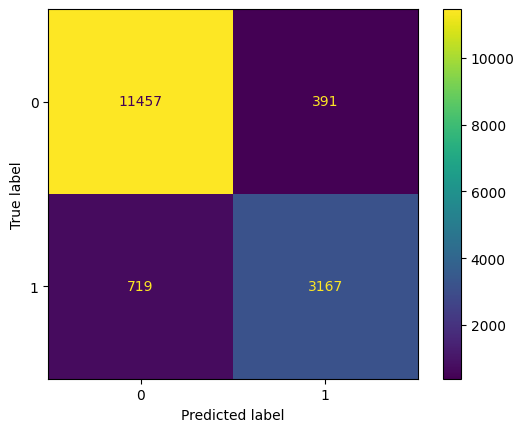

Model is  BernoulliNB()
Accuracy: 0.8780348290326682
Classification report:               precision    recall  f1-score   support

           0       0.86      1.00      0.93     11848
           1       1.00      0.51      0.67      3886

    accuracy                           0.88     15734
   macro avg       0.93      0.75      0.80     15734
weighted avg       0.90      0.88      0.86     15734

Confusion matrix and plot
[[11848     0]
 [ 1919  1967]]


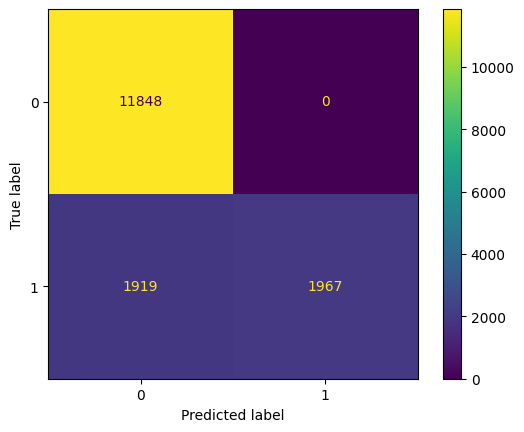

Model is  SVC()
Accuracy: 0.986017541629592
Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11848
           1       0.98      0.97      0.97      3886

    accuracy                           0.99     15734
   macro avg       0.98      0.98      0.98     15734
weighted avg       0.99      0.99      0.99     15734

Confusion matrix and plot
[[11755    93]
 [  127  3759]]


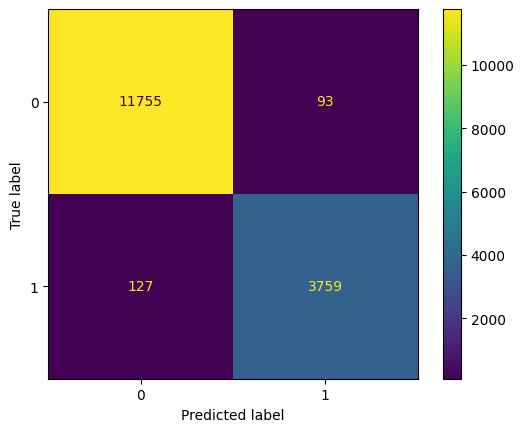

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
import matplotlib.pyplot as plt
for i in lst:
    print("Model is ",i)
    i.fit(x_train,y_train)
    y_pred=i.predict(xtest)
    print("Accuracy:",accuracy_score(ytest,y_pred))
    print("Classification report:",classification_report(ytest,y_pred))
    print("Confusion matrix and plot")
    cm=confusion_matrix(ytest,y_pred)
    print(cm)
    cmd=ConfusionMatrixDisplay(cm)
    cmd.plot()
    plt.show()


In [71]:
from sklearn.utils import resample

# Assuming 'df' is your DataFrame and 'target' is the target variable
df_minority = df[df['Preference'] == 1]
df_majority = df[df['Preference'] == 0]

# Oversample the minority class
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority))

# Combine the oversampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0
5,25,1,110588,1,3,2,2895,2,6,47,0,0,1,0
6,38,1,22245,0,1,3,4994,0,157,225,0,0,1,0
7,56,2,109411,0,8,2,3656,2,210,166,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12349,31,2,54699,0,6,0,2833,2,133,243,0,0,1,1
11416,18,2,100550,0,3,1,2477,0,208,233,2,1,1,1
36407,38,0,64068,1,8,1,3416,0,54,201,0,0,0,1
23946,30,1,23378,1,2,0,1309,1,183,201,1,1,1,1


*********************************************************************

Model:  KNeighborsClassifier(n_neighbors=7)

Accuracy:  0.9181440325727372

confusion matrix :  [[10106  1703]
 [  227 11542]]

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.86      0.91     11809
           1       0.87      0.98      0.92     11769

    accuracy                           0.92     23578
   macro avg       0.92      0.92      0.92     23578
weighted avg       0.92      0.92      0.92     23578


Confusion Matrix Display :


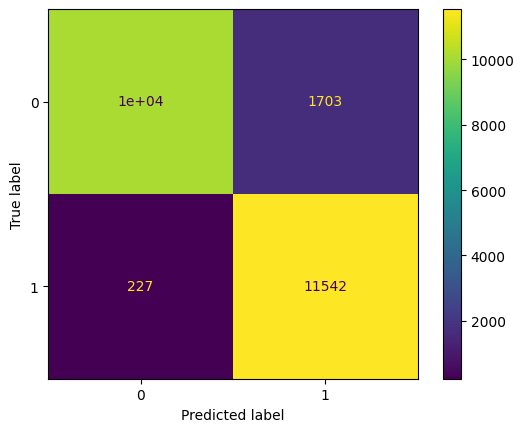


*********************************************************************

Model:  SVC()

Accuracy:  0.9877003986767325

confusion matrix :  [[11525   284]
 [    6 11763]]

Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     11809
           1       0.98      1.00      0.99     11769

    accuracy                           0.99     23578
   macro avg       0.99      0.99      0.99     23578
weighted avg       0.99      0.99      0.99     23578


Confusion Matrix Display :


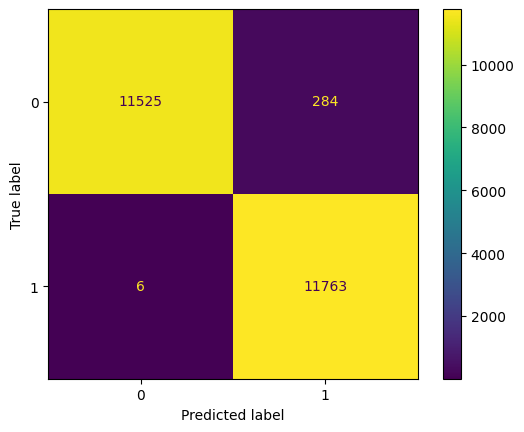


*********************************************************************

Model:  BernoulliNB()

Accuracy:  0.9273899397743659

confusion matrix :  [[10268  1541]
 [  171 11598]]

Classification Report :                precision    recall  f1-score   support

           0       0.98      0.87      0.92     11809
           1       0.88      0.99      0.93     11769

    accuracy                           0.93     23578
   macro avg       0.93      0.93      0.93     23578
weighted avg       0.93      0.93      0.93     23578


Confusion Matrix Display :


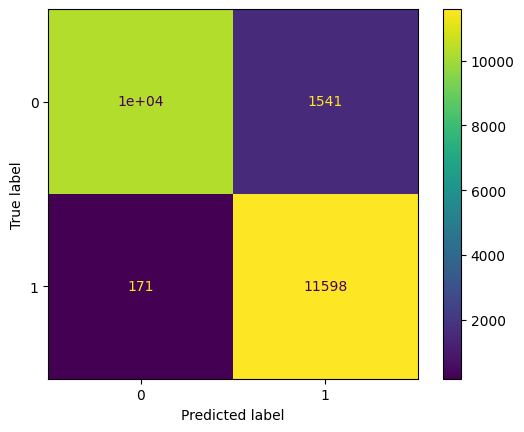

In [72]:
x=df_balanced.iloc[:,:-1].values
y=df_balanced.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

knn=KNeighborsClassifier(n_neighbors=7)
svm=SVC()
bernol=BernoulliNB()

list=[knn,svm,bernol]
for i in list:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(cm)
    print("*********************************************************************")
    print("\nModel: ",i)
    print('\nAccuracy: ',accuracy_score(y_test,y_pred))
    print("\nconfusion matrix : ",cm)
    print('\nClassification Report : ',classification_report(y_test,y_pred))
    print('\nConfusion Matrix Display :')
    cmd.plot()
    plt.show()
    print()